## **Ultrasound Nerve Segmentation** 

Importing necessary libraries 

In [1]:
from fastai import *
from fastai.vision import *
import PIL

### Data

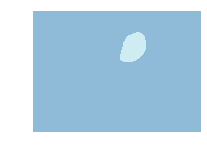

In [2]:
mask = open_mask("/kaggle/input/ultrasound-nerve-segmentation/train/1_37_mask.tif", div=True)
mask.show()

In [3]:
mask.data; mask.data.max()

tensor(1)

In [4]:
class SegmentationLabelListCustom(SegmentationLabelList):
    def open(self, fn): 
        return open_mask(fn, div=True)
class SegmentationItemListCustom(SegmentationItemList):
    _label_cls = SegmentationLabelListCustom

In [5]:
label_func =  lambda fname: fname.with_name(str(fname.stem) + "_mask" + str(fname.suffix))
valid_func =  lambda fname: re.search("1_[0-9]*.tif$", str(fname)) or re.search("2_[0-9]*.tif$", str(fname))
train_filter = lambda fname: "mask" not in str(fname)
src = (SegmentationItemListCustom.from_folder('/kaggle/input/ultrasound-nerve-segmentation/train')
        .filter_by_func(train_filter)
        .split_by_valid_func(valid_func)
        .label_from_func(label_func, classes = ['0', '1']))

We will use the image resolution of 128 X 128 to speed up the training process.

For better accuracy - Use the full resolution provided in the original dataset.

In [6]:
data = (src.transform(get_transforms(), size=128, tfm_y=True)
        .databunch(bs=4)
        .normalize(imagenet_stats))
data

ImageDataBunch;

Train: LabelList (4435 items)
x: SegmentationItemListCustom
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: SegmentationLabelListCustom
ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128)
Path: /kaggle/input/ultrasound-nerve-segmentation/train;

Valid: LabelList (1200 items)
x: SegmentationItemListCustom
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: SegmentationLabelListCustom
ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128)
Path: /kaggle/input/ultrasound-nerve-segmentation/train;

Test: None

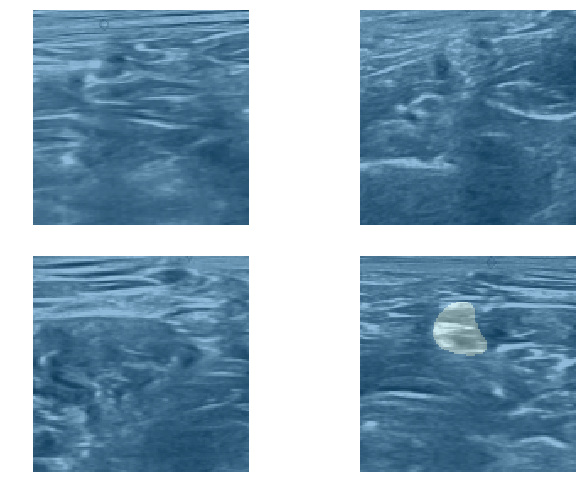

In [7]:
data.show_batch(2, figsize=(10, 7))

In [8]:
metrics = [dice]

> ### Training 

In [9]:
learn = unet_learner(data, models.resnet34, metrics=metrics)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 84.3MB/s]


In [10]:
learn.model_dir = '/kaggle/working/'

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


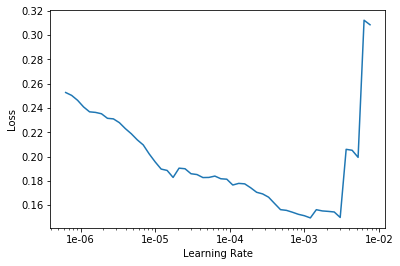

In [11]:
lr_find(learn)
learn.recorder.plot()

In [12]:
lr=1e-4
learn.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,dice,time
0,0.050287,0.041169,0.412745,02:27
1,0.038689,0.038301,0.586069,02:22
2,0.036606,0.035850,0.559224,02:22


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


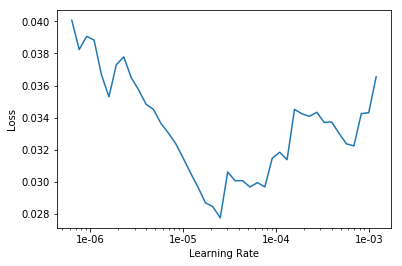

In [13]:
lr_find(learn)
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(5, slice(2e-5, lr/2))

epoch,train_loss,valid_loss,dice,time
0,0.032989,0.034990,0.603996,02:21
1,0.031811,0.034495,0.601401,02:21
2,0.032647,0.032664,0.640219,02:22
3,0.029211,0.032473,0.650937,02:22


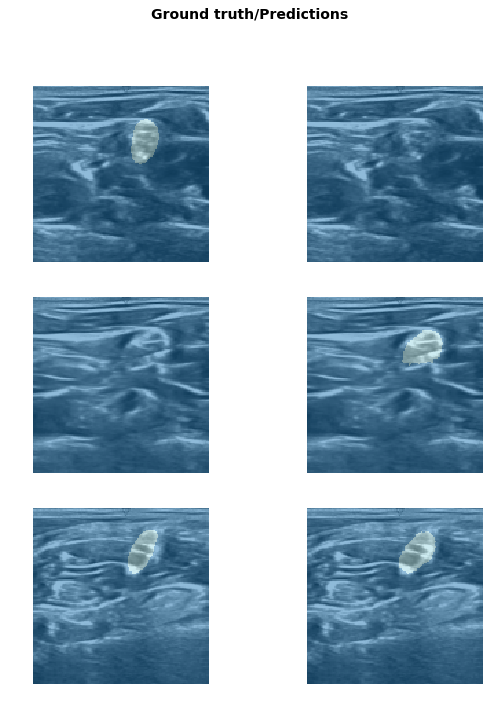

In [15]:
learn.show_results(rows=3, figsize=(9,11))

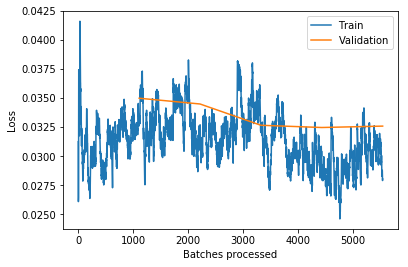

In [16]:
learn.recorder.plot_losses()

In [17]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


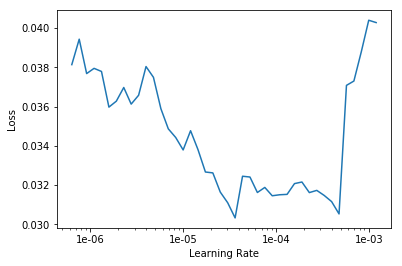

In [18]:
lr_find(learn)
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(10, slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,dice,time
0,0.030688,0.032435,0.659102,02:39
1,0.029267,0.035447,0.649127,02:41
2,0.030294,0.034725,0.608728,02:40
3,0.029995,0.033566,0.598060,02:40
4,0.029993,0.034260,0.621078,02:42
5,0.031248,0.035169,0.620503,02:43
6,0.027206,0.033450,0.672319,02:40
7,0.026867,0.032761,0.658181,02:40
8,0.027431,0.032952,0.676867,02:38


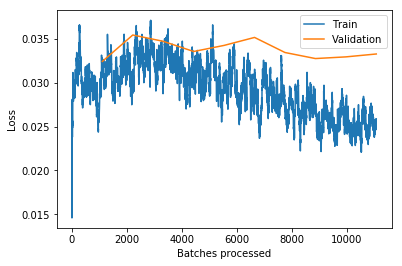

In [20]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


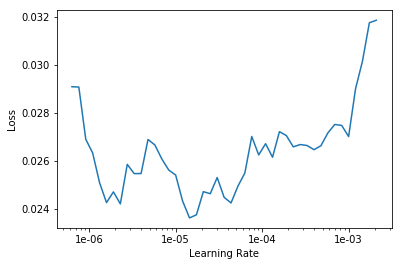

In [21]:
lr_find(learn)
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(10, slice(3e-5, 6e-4))

epoch,train_loss,valid_loss,dice,time
0,0.032169,0.035979,0.603464,02:41
1,0.034064,0.036856,0.604373,02:41
2,0.041128,0.036247,0.591693,02:41
3,0.033638,0.042274,0.666189,02:39
4,0.030350,0.035133,0.564736,02:41
5,0.042330,0.035562,0.669942,02:43
6,0.028235,0.032524,0.658395,02:44
7,0.028087,0.032407,0.691701,02:39
8,0.027261,0.035074,0.710372,02:40


### Results

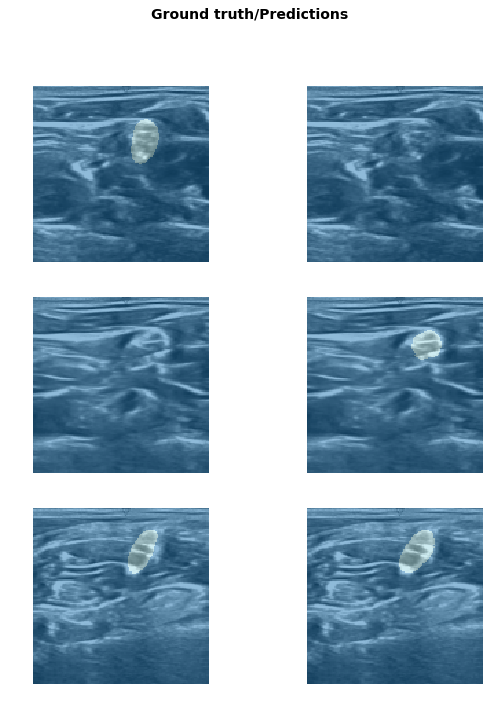

In [23]:
learn.show_results(rows=3, figsize=(9,11))

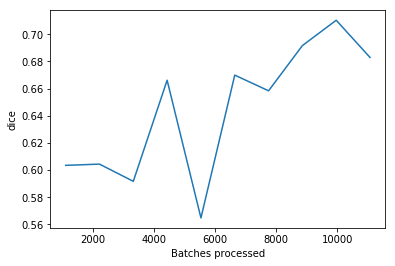

In [24]:
learn.recorder.plot_metrics()

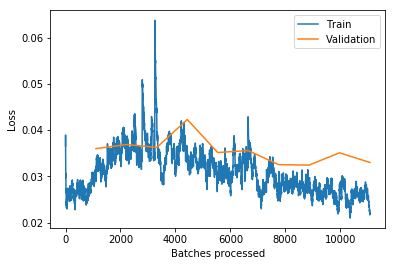

In [25]:
learn.recorder.plot_losses()

In [26]:
learn.save('/kaggle/working/stage-1')

In [27]:
# data = (src.transform(get_transforms(), size=320, tfm_y=True)
#         .databunch(bs=4)
#         .normalize(imagenet_stats))
# data

In [28]:
# learn_full_res = unet_learner(data, models.resnet34, metrics=metrics)

In [29]:
# learn_full_res.load('/kaggle/working/stage-1')

In [30]:
# learn_full_res.freeze()

In [31]:
# learn_full_res.model_dir = '/kaggle/working/'

In [32]:
# lr_find(learn_full_res)
# learn_full_res.recorder.plot()

In [33]:
# learn_full_res.fit_one_cycle(5, 9e-5)

In [34]:
# learn_full_res.unfreeze()

In [35]:
# lr_find(learn_full_res)
# learn_full_res.recorder.plot()

In [36]:
# learn_full_res.fit_one_cycle(10, slice(5e-6, 5e-5))